In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

file_to_load = "crash_info.csv"

# Read Purchasing File and store into Pandas data frame
crash_data = pd.read_csv(file_to_load)
crash_data.head()

,X,Y,OBJECTID,ACC_ID,ROAD_NO,ROAD_NAME,COMMON_ROAD_NAME,CWAY,SLK,INTERSECTION_NO,...,ACCIDENT_TYPE,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED
0,115.792274,-32.029452,27585440,10231294,1190012,Preston Point Rd,Preston Point Rd,S,0.86,47160.0,...,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0
1,115.821106,-31.901343,27585441,10231300,H561,Hutton St on to Mitchell Fwy (Southbound),Hutton St on to Mitchell Fwy (Southbound),S,0.00,4347.0,...,Intersection,PDO Major,Rear End,NaN,0,0,0,0,2,0
2,115.970937,-32.066115,27585442,10231306,1040003,Spencer Rd,Spencer Rd,L,4.97,43773.0,...,Intersection,PDO Major,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0
3,115.852685,-31.952160,27585443,10231312,1240111,Hay St,Hay St,S,2.92,NaN,...,Midblock,PDO Minor,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0
4,115.949014,-31.906427,27585444,10231318,1110017,Palmerston St,Palmerston St,S,0.47,37514.0,...,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0


In [3]:
severity_groupby=crash_data.groupby("SEVERITY")
severity_count=severity_groupby["ACC_ID"].nunique()
severity_count


SEVERITY
Fatal          746
Hospital      6928
Medical      17779
PDO Major    72991
PDO Minor    38232
Name: ACC_ID, dtype: int64

In [4]:
crash_count = len(crash_data["ACC_ID"].unique())
crash_count


136676

In [5]:
fatal = crash_data.loc[crash_data["SEVERITY"] == "Fatal"]
fatal_count = len(fatal["ACC_ID"].unique())
fatal_count

hospital = crash_data.loc[crash_data["SEVERITY"] == "Hospital"]
hospital_count = len(hospital["ACC_ID"].unique())
hospital_count  

medical = crash_data.loc[crash_data["SEVERITY"] == "Medical"]
medical_count = len(medical["ACC_ID"].unique())
medical_count

PDO_MAJOR = crash_data.loc[crash_data["SEVERITY"] == "PDO Major"]
major_count = len(PDO_MAJOR["ACC_ID"].unique())
major_count

PDO_MINOR = crash_data.loc[crash_data["SEVERITY"] == "PDO Minor"]
minor_count = len(PDO_MINOR["ACC_ID"].unique())
minor_count

fatal_percentage = "{:.2f}%".format(fatal_count / crash_count * 100)
fatal_percentage

hospital_percentage = "{:.2f}%".format(hospital_count / crash_count * 100)
hospital_percentage

medical_percentage = "{:.2f}%".format(medical_count / crash_count * 100)
medical_percentage

major_percentage = "{:.2f}%".format(major_count / crash_count * 100)
major_percentage

minor_percentage = "{:.2f}%".format(minor_count / crash_count * 100)
minor_percentage

severity_summary = pd.DataFrame({
    "severity category":["Fatal", "Hospital", "Medical", "PDO Major", "PDO Minor"],
    "Total Count":[fatal_count, hospital_count, medical_count, major_count, minor_count],
    "Percentage of Severity":[fatal_percentage, hospital_percentage, medical_percentage, major_percentage, minor_percentage],})

severity_summary=severity_summary.set_index("severity category")
severity_summary.index.name = None
severity_summary


,Total Count,Percentage of Severity
Fatal,746,0.55%
Hospital,6928,5.07%
Medical,17779,13.01%
PDO Major,72991,53.40%
PDO Minor,38232,27.97%


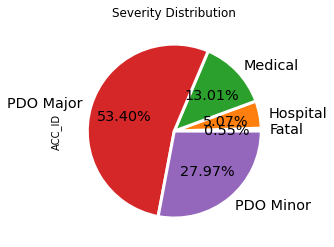

In [6]:
severity_data = crash_data.groupby('SEVERITY').count()['ACC_ID']
severity_df = pd.DataFrame(severity_data)
severity_df

plt.pie(severity_data,labels=severity_data.index,autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'})
plt.title('Severity Distribution')
plt.ylabel('ACC_ID')
plt.show()

In [7]:
severity_summary.describe()

,Total Count
count,5.000000
mean,27335.200000
std,29231.629491
min,746.000000
25%,6928.000000
50%,17779.000000
75%,38232.000000
max,72991.000000


Text(0, 0.5, 'Count of Accidents')

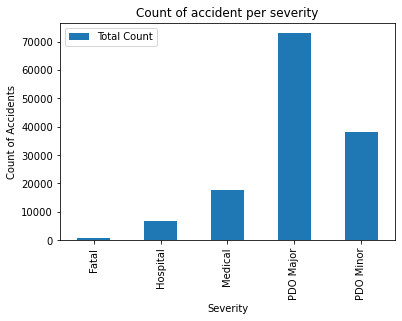

In [8]:
bar_plot_data = severity_summary.plot.bar(rot='vertical',title='Count of accident per severity')

bar_plot_data.set_xlabel("Severity")
bar_plot_data.set_ylabel("Count of Accidents")

In [7]:
crash_data[["day", "month", "year"]] = crash_data["CRASH_DATE"].str.split("/", expand = True)
crash_data.head()

,X,Y,OBJECTID,ACC_ID,ROAD_NO,ROAD_NAME,COMMON_ROAD_NAME,CWAY,SLK,INTERSECTION_NO,...,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED,day,month,year
0,115.792274,-32.029452,27585440,10231294,1190012,Preston Point Rd,Preston Point Rd,S,0.86,47160.0,...,NaN,0,0,0,0,2,0,07,05,2020
1,115.821106,-31.901343,27585441,10231300,H561,Hutton St on to Mitchell Fwy (Southbound),Hutton St on to Mitchell Fwy (Southbound),S,0.00,4347.0,...,NaN,0,0,0,0,2,0,07,05,2020
2,115.970937,-32.066115,27585442,10231306,1040003,Spencer Rd,Spencer Rd,L,4.97,43773.0,...,Involving Overtaking,0,0,0,0,2,0,06,05,2020
3,115.852685,-31.952160,27585443,10231312,1240111,Hay St,Hay St,S,2.92,NaN,...,Involving Overtaking,0,0,0,0,2,0,06,05,2020
4,115.949014,-31.906427,27585444,10231318,1110017,Palmerston St,Palmerston St,S,0.47,37514.0,...,NaN,0,0,0,0,2,0,04,05,2020


In [8]:
severity_year_groupby = crash_data.groupby(["SEVERITY"])["year"].value_counts()
severity_year_groupby


SEVERITY   year
Fatal      2016      171
           2019      152
           2017      146
           2018      143
           2020      134
Hospital   2016     1430
           2018     1427
           2017     1423
           2019     1345
           2020     1303
Medical    2016     4115
           2017     3681
           2018     3461
           2020     3356
           2019     3166
PDO Major  2016    15938
           2018    15162
           2017    15037
           2019    14756
           2020    12098
PDO Minor  2016     8763
           2017     7734
           2019     7686
           2018     7654
           2020     6395
Name: year, dtype: int64

In [9]:
severity_type_groupby = crash_data.groupby(["SEVERITY"])["ACCIDENT_TYPE"].value_counts()
severity_type_groupby

SEVERITY   ACCIDENT_TYPE
Fatal      Midblock           607
           Intersection       139
Hospital   Midblock          3958
           Intersection      2970
Medical    Intersection     11022
           Midblock          6757
PDO Major  Intersection     38988
           Midblock         34003
PDO Minor  Midblock         19202
           Intersection     19030
Name: ACCIDENT_TYPE, dtype: int64

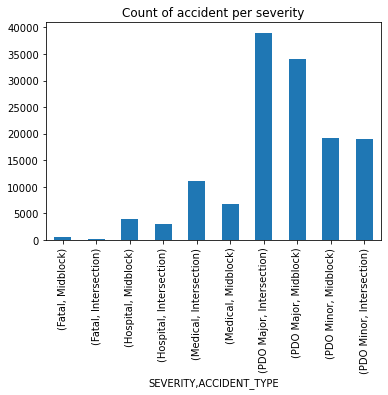

In [10]:
bar_plot_data = severity_type_groupby.plot.bar(rot='vertical',title='Count of accident per severity')

In [11]:
midblock = crash_data.loc[crash_data["ACCIDENT_TYPE"] == "Midblock"]
midblock_count = len(midblock["ACC_ID"].unique())
midblock_count

intersection = crash_data.loc[crash_data["ACCIDENT_TYPE"] == "Intersection"]
intersection_count = len(intersection["ACC_ID"].unique())
intersection_count 

midblock_percentage = "{:.2f}%".format(midblock_count / crash_count * 100)
midblock_percentage

intersection_percentage = "{:.2f}%".format(intersection_count / crash_count * 100)
intersection_percentage

accident_summary = pd.DataFrame({
    "accident type category":["Midblock", "Intersection"],
    "Total Count":[midblock_count, intersection_count],
    "Percentage of Accident Type":[midblock_percentage, intersection_percentage],})

accident_summary

,accident type category,Total Count,Percentage of Accident Type
0,Midblock,64527,47.21%
1,Intersection,72149,52.79%


In [12]:
critical_value = st.chi2.ppf(q=0.95, df = 1)
critical_value

3.841458820694124

In [13]:
accident_data = crash_data.groupby('ACCIDENT_TYPE').count()['ACC_ID']
accident_df = pd.DataFrame(accident_data)

accident_stats = pd.DataFrame({
    "accident type category":["Midblock", "Intersection"],
    "observed":[midblock_count, intersection_count],
    "expected":[68338, 68338],})
accident_stats


,accident type category,observed,expected
0,Midblock,64527,68338
1,Intersection,72149,68338


In [14]:
st.chisquare(accident_stats['observed'], accident_stats['expected'])

#reject null hypothesis - we conclude that the differences seen in number of accidents per type of accident are statistically significant.accident_stats

Power_divergenceResult(statistic=425.0554888934414, pvalue=1.9367554530148811e-94)

Text(0, 0.5, 'Number of Accidents')

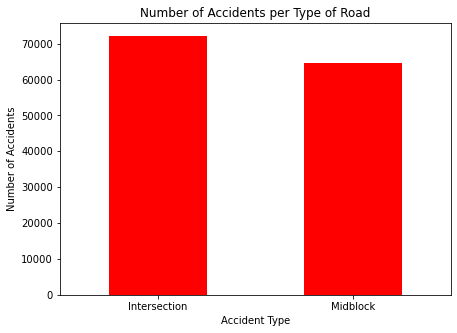

In [55]:
bar_plot_data = accident_data.plot.bar(figsize = (7,5), fontsize = 10, rot='horizontal', color = 'red' ,title='Number of Accidents per Type of Road')

bar_plot_data.set_xlabel("Accident Type")
bar_plot_data.set_ylabel("Number of Accidents")

In [16]:
time_bins = [0, 359, 659, 959, 1259, 1559, 1859, 2159, 2359]
time_names = ["0-3", "4-6", "7-9", "10-12", "13-15", "16-18", "19-21", "22-24"]

group_time_df = crash_data
group_time_df["Time Interval"] = pd.cut(group_time_df["CRASH_TIME"],time_bins, labels=time_names)
group_time_df

group_time_df["Time Interval"].value_counts()

16-18    33435
13-15    29911
7-9      24744
10-12    23769
19-21    10713
4-6       6425
22-24     3950
0-3       3144
Name: Time Interval, dtype: int64

In [32]:
severity_time_groupby = group_time_df.groupby(["SEVERITY"])["Time Interval"].value_counts()
severity_time_groupby



SEVERITY   Time Interval
Fatal      13-15              142
           16-18              121
           10-12              117
           19-21              100
           0-3                 75
           4-6                 74
           7-9                 64
           22-24               51
Hospital   16-18             1489
           13-15             1433
           10-12             1136
           7-9                944
           19-21              781
           4-6                430
           22-24              343
           0-3                318
Medical    16-18             4459
           13-15             3868
           7-9               3864
           10-12             2980
           19-21             1125
           4-6                812
           22-24              345
           0-3                243
PDO Major  16-18            18152
           13-15            15889
           7-9              12668
           10-12            12657
           19-21       

In [45]:
severity_time_groupby["Fatal"].sort_index()

Time Interval
0-3       75
10-12    117
13-15    142
16-18    121
19-21    100
22-24     51
4-6       74
7-9       64
Name: Time Interval, dtype: int64

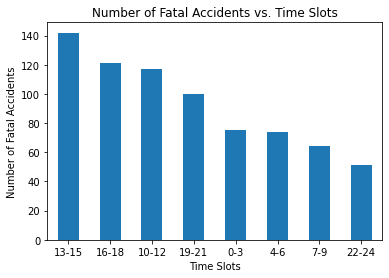

In [44]:
severity_time_groupby["Fatal"].plot(kind="bar", title="Number of Fatal Accidents vs. Time Slots",rot=0)
plt.ylabel("Number of Fatal Accidents")
plt.xlabel("Time Slots")
plt.show()